Authors: Joe Brown, Derek Markey, Joseph Sharp

# Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings

warnings.filterwarnings('ignore')
pd.plotting.register_matplotlib_converters

<function pandas.plotting._converter.register(explicit=True)>

## reserves

### oil

In [3]:
oil_reserve = pd.read_excel('bp-stats-review-2018-all-data.xlsx', 
                   sheet_name='Oil - Proved reserves history',
                   header=2)
oil_reserve = oil_reserve.rename(index=str, columns={'Thousand million barrels': 'Year'})
oil_reserve = oil_reserve.set_index('Year').T
oil_reserve = oil_reserve[['Total North America', 'Total S. & Cent. America','Total Europe', 'Total CIS', 
                           'Total Middle East', 'Total Africa', 'Total Asia Pacific', 'Total World']]
oil_reserve = oil_reserve.drop(['2006-16', '2017.1', '2017.2'])

In [3]:
# setting the index to datetime for future modeling
oil_reserve.index = pd.to_datetime(oil_reserve.index, format='%Y')

In [4]:
# Thousand million barrels
oil_reserve.head()

Year,Total North America,Total S. & Cent. America,Total Europe,Total CIS,Total Middle East,Total Africa,Total Asia Pacific,Total World
1980-01-01,123.284523,26.868108,16.578474,67.0,362.411087,53.436518,33.922920,683.501630
1981-01-01,133.667336,27.126774,15.768626,63.0,365.265147,56.281772,35.307581,696.417236
1982-01-01,132.389095,32.261346,15.329863,63.0,388.902022,58.270780,35.357492,725.510598
1983-01-01,133.223260,33.398236,16.410602,63.0,396.920800,58.038758,36.308410,737.300067
1984-01-01,133.030767,36.354382,15.761532,63.0,430.755250,57.766581,37.824072,774.492584


In [5]:
oil = pd.read_excel('bp-stats-review-2018-all-data.xlsx', 
                   sheet_name='Oil - Proved reserves',
                   header=5)
oil = oil.rename(columns={'Unnamed: 0': 'Thousand million barrels', 'Unnamed: 4': 'oil - Total', 
                          'Unnamed: 6': 'oil - Share of Total', 'Unnamed: 7': 'oil - R/P'})
oil = oil.loc[:,('Thousand million barrels', 'oil - Total', 'oil - Share of Total', 'oil - R/P')]
oil = oil.set_index('Thousand million barrels').T
me_africa = oil['Total Middle East'] + oil['Total Africa']
oil['Total Middle East & Africa'] = me_africa
oil = oil[['Total North America', 'Total S. & Cent. America','Total Europe ', 'Total CIS', 
           'Total Middle East & Africa', 'Total Asia Pacific', 'Total World']]
oil.head()

Thousand million barrels,Total North America,Total S. & Cent. America,Total Europe,Total CIS,Total Middle East & Africa,Total Asia Pacific,Total World
oil - Total,226.106,330.065,13.351,144.874,934.171,48.036,1696.6
oil - Share of Total,0.13327,0.194545,0.00786928,0.0853907,0.550612,0.028313,1
oil - R/P,30.8013,125.915,10.3952,27.7792,112.955,16.7034,50.1705


### gas

In [6]:
gas_reserve = pd.read_excel('bp-stats-review-2018-all-data.xlsx', 
                   sheet_name='Gas - Proved reserves history ',
                   header=2)
gas_reserve = gas_reserve.rename(index=str, columns={'Trillion cubic metres': 'Year'})
gas_reserve = gas_reserve.set_index('Year').T
gas_reserve = gas_reserve[['Total North America', 'Total S. & Cent. America','Total Europe', 'Total CIS', 
           'Total Middle East', 'Total Africa', 'Total Asia Pacific', 'Total World']]
gas_reserve = gas_reserve.drop(['2006-16', '2017.1', '2017.2'])

In [7]:
# setting the index to datetime for future modeling
gas_reserve.index = pd.to_datetime(gas_reserve.index, format='%Y')

In [8]:
# Trillion cubic metres
gas_reserve.head()

Year,Total North America,Total S. & Cent. America,Total Europe,Total CIS,Total Middle East,Total Africa,Total Asia Pacific,Total World
1980-01-01,9.578493,2.793045,4.243748,20.469296,24.247531,5.746403,4.546935,71.625451
1981-01-01,10.023500,2.987888,4.080368,21.748627,24.549528,5.674221,5.138492,74.202624
1982-01-01,10.044260,3.136588,3.951285,22.388292,25.422290,6.030390,5.689784,76.662889
1983-01-01,10.077446,3.208372,4.193240,23.027958,25.918804,6.031642,5.844091,78.301554
1984-01-01,10.179742,3.290666,4.127679,23.987457,26.961397,5.962575,6.516579,81.026096


In [9]:
gas = pd.read_excel('bp-stats-review-2018-all-data.xlsx', 
                   sheet_name='Gas - Proved reserves',
                   header=5)
gas = gas.rename(columns={'Unnamed: 0': 'Trillion cubic metres', 'Unnamed: 4': 'gas - Total', 
                          'Unnamed: 6': 'gas - Share of Total', 'Unnamed: 7': 'gas - R/P'})
gas = gas.loc[:,('Trillion cubic metres', 'gas - Total', 'gas - Share of Total', 'gas - R/P')]
gas = gas.set_index('Trillion cubic metres').T
me_africa = gas['Total Middle East'] + gas['Total Africa']
gas['Total Middle East & Africa'] = me_africa
gas = gas[['Total North America', 'Total S. & Cent. America','Total Europe', 'Total CIS', 
           'Total Middle East & Africa', 'Total Asia Pacific', 'Total World']]
gas.head()

Trillion cubic metres,Total North America,Total S. & Cent. America,Total Europe,Total CIS,Total Middle East & Africa,Total Asia Pacific,Total World
gas - Total,10.815459,8.219737,2.957940,59.213885,92.936902,19.307643,193.451567
gas - Share of Total,0.055908,0.042490,0.015290,0.306092,0.480414,0.099806,1.000000
gas - R/P,11.366507,45.918680,12.227426,72.609685,181.289807,31.780742,52.562966


### coal

In [10]:
coal = pd.read_excel('bp-stats-review-2018-all-data.xlsx', 
                   sheet_name='Coal - Reserves',
                   header=3)
coal = coal.set_index('Million tonnes').T
coal = coal[['Total North America', 'Total S. & Cent. America','Total Europe ', 'Total CIS', 
           'Total Middle East & Africa', 'Total Asia Pacific', 'Total World']]
coal = coal.iloc[2:5]
coal = coal.rename(index={'Total': 'coal - Total', 'Share of Total': 'coal - Share of Total', 
                   'R/P ratio': 'coal - R/P'})
coal.head()

Million tonnes,Total North America,Total S. & Cent. America,Total Europe,Total CIS,Total Middle East & Africa,Total Asia Pacific,Total World
coal - Total,258709,14016,100405,223228,14420,424234,1.03501e+06
coal - Share of Total,0.249958,0.0135419,0.0970085,0.215677,0.0139322,0.409883,1
coal - R/P,335.043,140.555,159.371,396.827,53.0584,79.1523,134.488


## production

### oil

In [11]:
prod = pd.read_excel('bp-stats-review-2018-all-data.xlsx', 
                   sheet_name='Oil Production - Barrels',
                   header=2)
prod = prod.rename(index=str, columns={'Thousand barrels daily': 'Year'})
prod = prod.set_index('Year').T
prod = prod[['Total North America', 'Total S. & Cent. America','Total Europe', 'Total CIS', 
           'Total Middle East', 'Total Africa', 'Total Asia Pacific', 'Total World']]
prod = prod.drop(['2006-16', '2017.1', '2017.2'])

In [12]:
# setting the index to datetime for future modeling
prod.index = pd.to_datetime(prod.index, format='%Y')

In [13]:
# Thousand barrels daily
prod.tail()

Year,Total North America,Total S. & Cent. America,Total Europe,Total CIS,Total Middle East,Total Africa,Total Asia Pacific,Total World
2013-01-01,16946.380696,7403.090778,3355.505136,13833.772343,28193.974708,8579.724695,8257.115958,86569.564312
2014-01-01,18822.923782,7663.119908,3389.545872,13830.166351,28496.343097,8191.321424,8327.129138,88720.549570
2015-01-01,19725.949071,7758.738210,3538.244189,13966.389775,30022.950169,8130.233133,8404.609421,91547.113970
2016-01-01,19291.781830,7418.270723,3566.298179,14161.710763,31848.510951,7686.757949,8049.948562,92023.278957
2017-01-01,20111.771611,7181.714358,3518.753706,14288.217842,31597.002901,8072.180876,7878.989057,92648.630350


### gas

In [484]:
prod_gas = pd.read_excel('bp-stats-review-2018-all-data.xlsx', 
                   sheet_name='Gas Production - Bcm',
                   header=2)
prod_gas = prod_gas.rename(index=str, columns={'Billion cubic metres': 'Year'})
prod_gas = prod_gas.set_index('Year').T
prod_gas = prod_gas[['Total North America', 'Total S. & Cent. America','Total Europe', 'Total CIS', 
           'Total Middle East', 'Total Africa', 'Total Asia Pacific', 'Total World']]
prod_gas = prod_gas.drop(['2006-16', '2017.1', '2017.2'])
# setting the index to datetime for future modeling
prod_gas.index = pd.to_datetime(prod_gas.index, format='%Y')

### coal

In [485]:
prod_coal = pd.read_excel('bp-stats-review-2018-all-data.xlsx', 
                   sheet_name='Coal Production - Tonnes',
                   header=2)
prod_coal = prod_coal.rename(index=str, columns={'Million tonnes ': 'Year'})
prod_coal = prod_coal.set_index('Year').T
prod_coal = prod_coal[['Total North America', 'Total S. & Cent. America','Total Europe', 'Total CIS', 
           'Total Middle East', 'Total Africa', 'Total Asia Pacific', 'Total World']]
prod_coal = prod_coal.drop(['2006-16', '2017.1', '2017.2'])
# setting the index to datetime for future modeling
prod_coal.index = pd.to_datetime(prod_coal.index, format='%Y')

## consumption

Honestly, we probably don't need to delve too deep into consumption.. articles that we've taken a look at mainly explore production and proven reserves

### oil

In [14]:
# I keep getting an error every time I run the commented out section.... but WHY
consumed = pd.read_excel('bp-stats-review-2018-all-data.xlsx', 
                   sheet_name='Oil Consumption - Barrels',
                   header=2)
consumed = consumed.rename(index=str, columns={'Thousand barrels daily': 'Year'})
consumed = consumed.set_index('Year').T
# consumed = consumed[['Total North America', 'Total S. & Cent. America', 'Total Europe'
#                      'Total CIS', 'Total Middle East', 'Total Africa', 'Total Asia Pacific', 
#                      'Total World']]
consumed = consumed.drop(['2006-16', '2017.1', '2017.2'])

In [15]:
# This is definitely a column
consumed.iloc[0:1,52:53]

Year,Total Europe
1965,8213.061692


In [16]:
# ah... here I have revealed the problem. There is a space at the end of Total Europe.
consumed.columns.values[52]

'Total Europe '

In [17]:
# stripping all of the columns to make sure this won't happen again...
consumed.columns = consumed.columns.str.strip()
consumed = consumed[['Total North America', 'Total S. & Cent. America', 'Total Europe',
                     'Total CIS', 'Total Middle East', 'Total Africa', 'Total Asia Pacific', 
                     'Total World']]

In [18]:
# setting the index to datetime for future modeling
consumed.index = pd.to_datetime(consumed.index, format='%Y')

In [19]:
# thousand barrels daily
consumed.tail()

Year,Total North America,Total S. & Cent. America,Total Europe,Total CIS,Total Middle East,Total Africa,Total Asia Pacific,Total World
2013-01-01,23378.764483,6986.708967,14262.739763,4175.994112,8870.499147,3724.116749,30688.992354,92087.815575
2014-01-01,23464.765636,7058.050466,14049.075958,4322.859179,9032.392812,3784.863418,31273.913159,92985.920628
2015-01-01,23818.231016,7021.286974,14413.479964,4162.049375,9029.499891,3877.215015,32521.028229,94842.790464
2016-01-01,24065.055970,6810.795798,14695.731501,4242.930001,9160.648156,3950.240888,33562.408502,96487.810816
2017-01-01,24218.567380,6794.113963,14980.497987,4281.553687,9290.048865,4047.140280,34573.683752,98185.605914


## world cumulative sum

### oil

In [594]:
world = pd.DataFrame(index=prod.index)
world['total reserves'], world['annual production'], world['annual consumption'] = (
    oil_reserve['Total World'].apply(lambda x: x*1e9), # thousand million barrels
    prod['Total World'].apply(lambda y: y*1000*365), # thousand barrels daily
    consumed['Total World'].apply(lambda x: x*1000*365) # thousand barrels daily
)
world['total consumption'] = world['annual consumption'].cumsum()
world['total production'] = world['annual production'].cumsum()

In [595]:
world.tail()

,total reserves,annual production,annual consumption,total consumption,total production
2013-01-01,1.698667e+12,3.159789e+10,3.361205e+10,1.179976e+12,1.161402e+12
2014-01-01,1.702429e+12,3.238300e+10,3.393986e+10,1.213916e+12,1.193785e+12
2015-01-01,1.689643e+12,3.341470e+10,3.461762e+10,1.248534e+12,1.227200e+12
2016-01-01,1.697083e+12,3.358850e+10,3.521805e+10,1.283752e+12,1.260788e+12
2017-01-01,1.696604e+12,3.381675e+10,3.583775e+10,1.319589e+12,1.294605e+12


### gas

In [490]:
world_gas = pd.DataFrame(index=prod_gas.index)
world_gas['total reserves'], world_gas['annual production'] = (
    gas_reserve['Total World'].apply(lambda y: y*1e12), # trillion cubic meters
    prod_gas['Total World'].apply(lambda y: y*1e9), # billion cubic meters
)
world_gas.tail()

,total reserves,annual production
2013-01-01,1.918905e+14,3.376189e+12
2014-01-01,1.932266e+14,3.446865e+12
2015-01-01,1.914657e+14,3.519429e+12
2016-01-01,1.930916e+14,3.549817e+12
2017-01-01,1.934516e+14,3.680378e+12


### coal

There's no history for proven reserves of coal...... that we have access to.

# Visualization

## reserves

### oil

In [677]:
# obtaining the labels for each series
labels = oil_reserve.columns

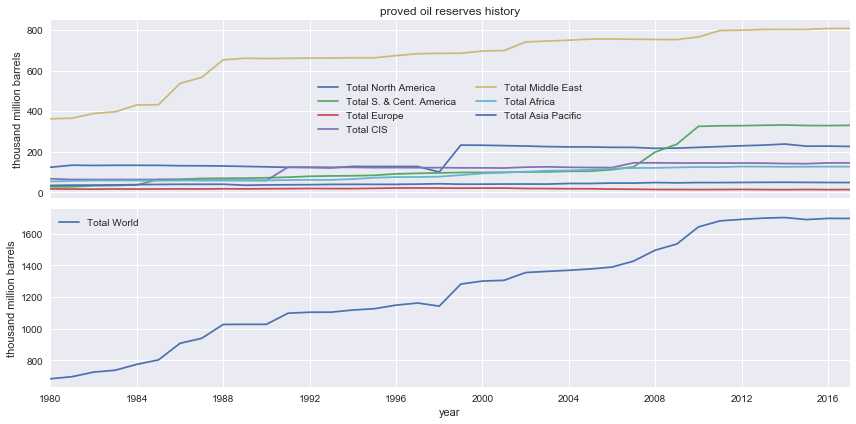

In [684]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(12, 6), sharex=True)

ax1.plot(oil_reserve.drop('Total World', axis=1))
ax1.set_title('proved oil reserves history')
ax1.set_ylabel('thousand million barrels')
ax1.legend(labels, ncol=2);

ax2.plot(oil_reserve['Total World'])
ax2.set_xlabel('year')
ax2.set_ylabel('thousand million barrels')
ax2.legend(labels[[7]])
plt.tight_layout()
plt.xlim(oil_reserve.index[0],oil_reserve.index[-1]);

### gas

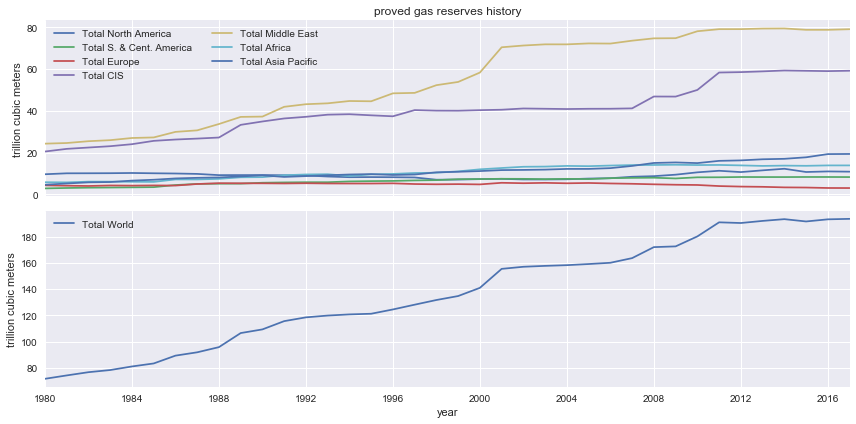

In [685]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(12, 6), sharex=True)

ax1.plot(gas_reserve.drop('Total World', axis=1))
ax1.set_title('proved gas reserves history')
ax1.set_ylabel('trillion cubic meters')
ax1.legend(labels, ncol=2);

ax2.plot(gas_reserve['Total World'])
ax2.set_xlabel('year')
ax2.set_ylabel('trillion cubic meters')
ax2.legend(labels[[7]])
plt.tight_layout()
plt.xlim(gas_reserve.index[0],gas_reserve.index[-1]);

## production

### oil

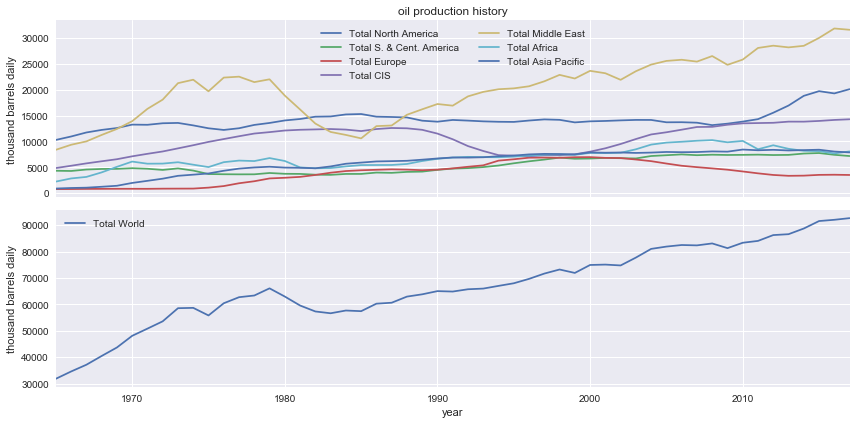

In [683]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(12, 6), sharex=True)

ax1.plot(prod.drop('Total World', axis=1))
ax1.set_title('oil production history')
ax1.set_ylabel('thousand barrels daily')
ax1.legend(labels, ncol=2)

ax2.plot(prod['Total World'])
ax2.set_xlabel('year')
ax2.set_ylabel('thousand barrels daily')
ax2.legend(labels[[7]])
plt.xlim(prod.index[0], prod.index[-1])
plt.tight_layout();

Explanation for the dip in the 80s: https://en.m.wikipedia.org/wiki/1980s_oil_glut#OPEC

### gas

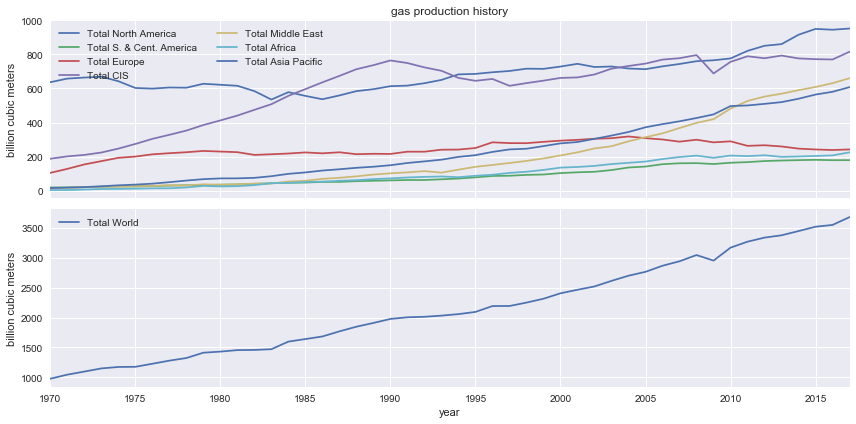

In [686]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, figsize=(12, 6), sharex=True)

ax1.plot(prod_gas.drop('Total World', axis=1))
ax1.set_title('gas production history')
ax1.set_ylabel('billion cubic meters')
ax1.legend(labels, ncol=2)

ax2.plot(prod_gas['Total World'])
ax2.set_xlabel('year')
ax2.set_ylabel('billion cubic meters')
ax2.legend(labels[[7]])
plt.xlim(prod_gas.index[0], prod_gas.index[-1])
plt.tight_layout();

## consumption

### oil

In [687]:
# plt.figure(figsize=(12,8))
# plt.plot(consumed.drop('Total World', axis=1))
# plt.title('Oil Consumption History by Country')
# plt.xlabel('year')
# plt.ylabel('thousand barrels daily')
# plt.legend(labels);

In [688]:
# plt.figure(figsize=(12,8))
# plt.plot(consumed['Total World'])
# plt.title('Oil Consumption History')
# plt.xlabel('year')
# plt.ylabel('thousand barrels daily')
# plt.legend(labels[[7]]);

# Time Series

## oil

In [614]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

In [615]:
df = world['total reserves'].dropna()
df2 = world['annual production']

In [616]:
# fitting the ARIMA models
# ARIMA(p, d, q)
#    p: The number of lag observations included in the model, also called the lag order.
#    d: The number of times that the raw observations are differenced, also called the degree of differencing.
#    q: The size of the moving average window, also called the order of moving average.


model = ARIMA(df, order=(6,2,1), freq='AS-JAN')
fit = model.fit(disp=2)
output = fit.forecast(steps=60, alpha=0.2)

model2 = ARIMA(df2, order=(4,1,1), freq='AS-JAN')
fit2 = model2.fit(disp=2)
output2 = fit2.forecast(steps=60, alpha=0.2)

In [617]:
# creating the future predictions
index = [pd.to_datetime(x, format='%Y') for x in list(range(2017,2077))]
future = pd.DataFrame(data=output)
future = future.append(pd.Series(index), ignore_index=True)
future = future.rename({0:'forecast',1:'stderr',2:'conf_int',3:'year'}, axis=0)
future = future.T.set_index('year')

index2 = [pd.to_datetime(x, format='%Y') for x in list(range(2017,2077))]
future2 = pd.DataFrame(data=output2)
future2 = future2.append(pd.Series(index2), ignore_index=True)
future2 = future2.rename({0:'forecast',1:'stderr',2:'conf_int',3:'year'}, axis=0)
future2 = future2.T.set_index('year')

In [618]:
y1 = [future['conf_int'].values[x][0] for x in range(0,60)]
y2 = [future['conf_int'].values[x][1] for x in range(0,60)] 
y3 = [future2['conf_int'].values[x][0] for x in range(0,60)]
y4 = [future2['conf_int'].values[x][1] for x in range(0,60)]

future['lower_int'], future['upper_int'] = y1, y2
future2['lower_int'], future2['upper_int'] = y3, y4

In [619]:
# we want to take the cumulative sum after 2017, our speculated year for when reserves reach their peak
pred2 = future2['forecast'].cumsum()
y3, y4 = future2['lower_int'].cumsum(), future2['upper_int'].cumsum()

In [620]:
# we also want to figure out when the predictions will cross over
f = future[['forecast','lower_int','upper_int']]
f2 = future2[['forecast','lower_int','upper_int']].cumsum()
f2 = f2.rename(columns={'forecast':'forecast2', 'lower_int':'lower_int2', 'upper_int':'upper_int2'}) # renaming columns
pred = pd.concat([f, f2], axis=1) #concatenating both forecasts
pred['forecast_diff'], pred['lower_diff'], pred['upper_diff'] = (
    pred['forecast']-pred['forecast2'],
    pred['lower_int']-pred['forecast2'],
    pred['upper_int']-pred['forecast2'])

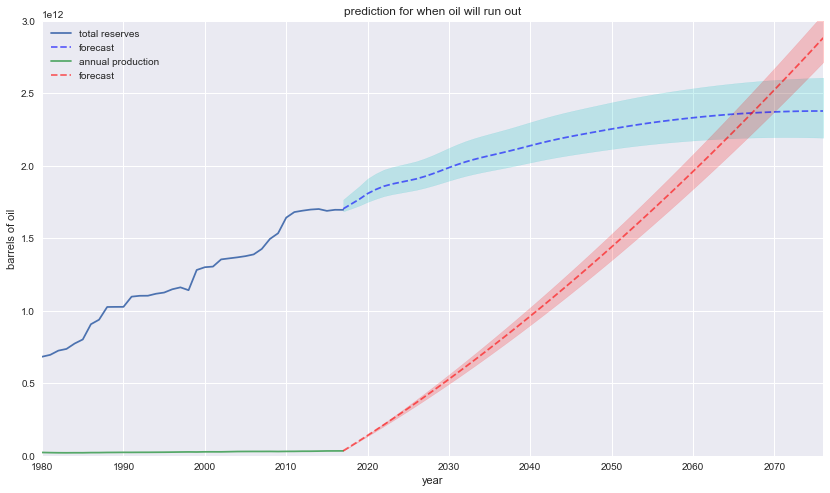

In [625]:
plt.figure(figsize=(14,8))
plt.plot(df)
plt.plot(future['forecast']-0.023e12, color='b', linestyle='--', alpha=0.6)
plt.fill_between(x=future.index, y1=y1, y2=y2, alpha=0.2, color='c')

plt.plot(df2)
plt.plot(pred2, color='r', linestyle='--', alpha=0.6)
plt.fill_between(x=pred2.index, y1=y3, y2=y4, alpha=0.2, color='r')

plt.ylim(0,3e12)
plt.xlim(df.index.values.min(), pd.to_datetime(2076, format='%Y'))
plt.ylabel('barrels of oil')
plt.xlabel('year')
# plt.axes().xaxis.set_minor_locator(MultipleLocator(5))

plt.title('prediction for when oil will run out')
plt.legend()

(736330.0, 757879.0)

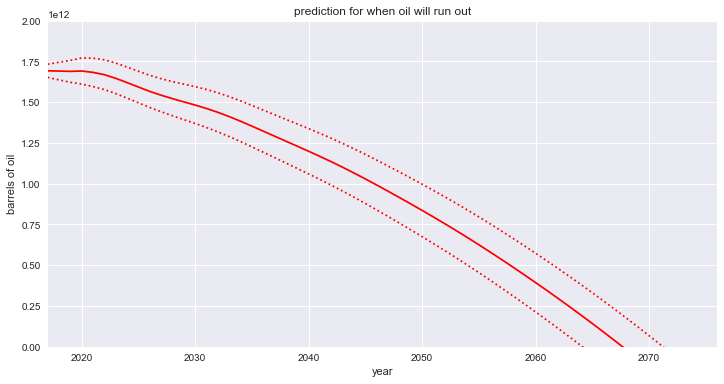

In [624]:
# showing when the series' converge
plt.figure(figsize=(12,6))
plt.plot(pred['forecast_diff'], c='r')
plt.plot(pred['lower_diff'], c='r', linestyle=':')
plt.plot(pred['upper_diff'], c='r', linestyle=':')
plt.title('prediction for when oil will run out')
plt.xlabel('year')
plt.ylabel('barrels of oil')
plt.ylim(0,2e12)
plt.xlim(pred.index[0],pred.index[-1])

## gas

In [627]:
df = world_gas['total reserves'].dropna()
df2 = world_gas['annual production']

In [628]:
model = ARIMA(df, order=(6,2,1), freq='AS-JAN')
fit = model.fit(disp=2)
output = fit.forecast(steps=60, alpha=0.2)

model2 = ARIMA(df2, order=(4,1,1), freq='AS-JAN')
fit2 = model2.fit(disp=2)
output2 = fit2.forecast(steps=60, alpha=0.2)

In [629]:
index = [pd.to_datetime(x, format='%Y') for x in list(range(2017,2077))]
future = pd.DataFrame(data=output)
future = future.append(pd.Series(index), ignore_index=True)
future = future.rename({0:'forecast',1:'stderr',2:'conf_int',3:'year'}, axis=0)
future = future.T.set_index('year')

index2 = [pd.to_datetime(x, format='%Y') for x in list(range(2017,2077))]
future2 = pd.DataFrame(data=output2)
future2 = future2.append(pd.Series(index2), ignore_index=True)
future2 = future2.rename({0:'forecast',1:'stderr',2:'conf_int',3:'year'}, axis=0)
future2 = future2.T.set_index('year')

In [630]:
y1 = [future['conf_int'].values[x][0] for x in range(0,60)]
y2 = [future['conf_int'].values[x][1] for x in range(0,60)]
y3 = [future2['conf_int'].values[x][0] for x in range(0,60)]
y4 = [future2['conf_int'].values[x][1] for x in range(0,60)]

future['lower_int'], future['upper_int'] = y1, y2
future2['lower_int'], future2['upper_int'] = y3, y4

In [631]:
# we want to take the cumulative sum after 2017, our speculated year for when reserves reach their peak
pred2 = future2['forecast'].cumsum()
y3, y4 = future2['lower_int'].cumsum(), future2['upper_int'].cumsum()

In [632]:
# we also want to figure out when the predictions will cross over
f = future[['forecast','lower_int','upper_int']]
f2 = future2[['forecast','lower_int','upper_int']].cumsum()
f2 = f2.rename(columns={'forecast':'forecast2', 'lower_int':'lower_int2', 'upper_int':'upper_int2'}) # renaming columns
pred = pd.concat([f, f2], axis=1) #concatenating both forecasts
pred['forecast_diff'], pred['lower_diff'], pred['upper_diff'] = (
    pred['forecast']-pred['forecast2'],
    pred['lower_int']-pred['forecast2'],
    pred['upper_int']-pred['forecast2'])

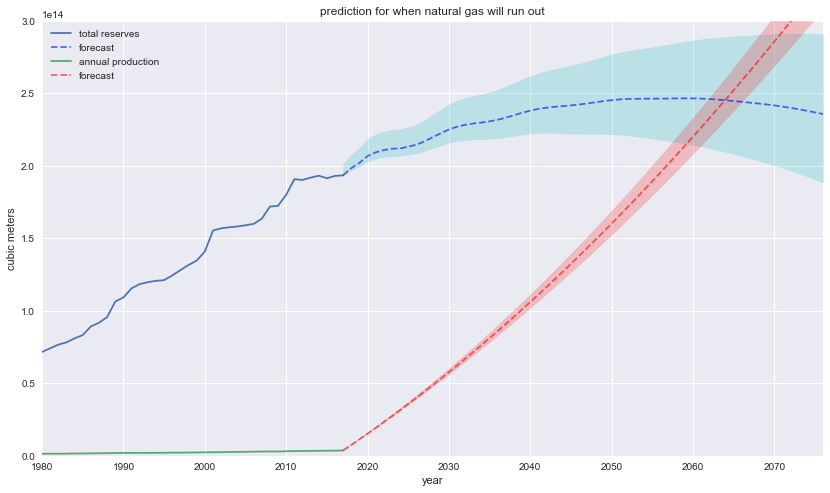

In [633]:
plt.figure(figsize=(14,8))
plt.plot(df)
plt.plot(future['forecast']-0.04e14, color='b', linestyle='--', alpha=0.6)
plt.fill_between(x=future.index, y1=y1, y2=y2, alpha=0.2, color='c')

plt.plot(df2)
plt.plot(pred2, color='r', linestyle='--', alpha=0.6)
plt.fill_between(x=pred2.index, y1=y3, y2=y4, alpha=0.2, color='r')

plt.ylim(0,3e14)
plt.xlim(df.index[0], pred2.index[-1])
plt.ylabel('cubic meters')
plt.xlabel('year')

plt.title('prediction for when natural gas will run out')
plt.legend()

(736330.0, 757879.0)

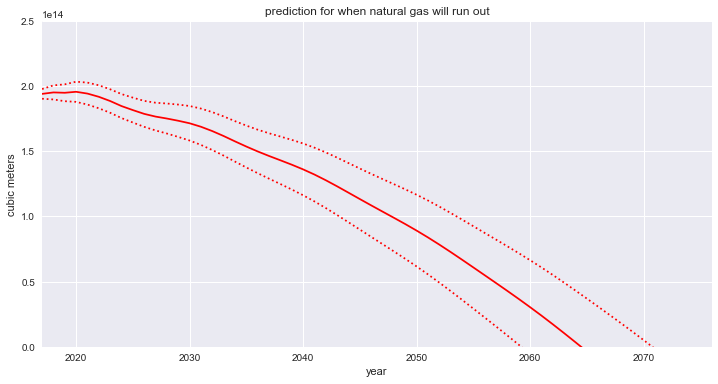

In [634]:
plt.figure(figsize=(12,6))
plt.plot(pred['forecast_diff'], c='r')
plt.plot(pred['lower_diff'], c='r', linestyle=':')
plt.plot(pred['upper_diff'], c='r', linestyle=':')
plt.title('prediction for when natural gas will run out')
plt.xlabel('year')
plt.ylabel('cubic meters')
plt.ylim(0,2.5e14)
plt.xlim(pred.index[0],pred.index[-1])

# Using R/P
https://ourworldindata.org/how-long-before-we-run-out-of-fossil-fuels

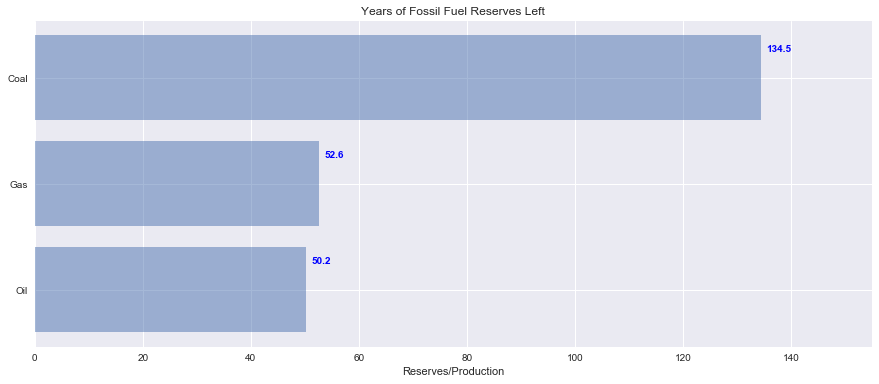

In [513]:
objects = ['Oil', 'Gas', 'Coal']
y_pos = np.arange(len(objects))
rp = [oil['Total World'].values[2], gas['Total World'].values[2], coal['Total World'].values[2]]

plt.figure(figsize=(15,6))
plt.barh(y_pos, rp, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Reserves/Production')
plt.title('Years of Fossil Fuel Reserves Left')
plt.xlim(0, 155)
for i, v in enumerate(rp):
    plt.text(v + 1, i + 0.25, str(round(v, 1)), color='blue', fontweight='bold')